# Bayes Theorem of Conditional Probability

<br>Before we dive into Bayes theorem, let’s review marginal, joint, and conditional probability.

Recall that marginal probability is the probability of an event, irrespective of other random variables. If the random variable is independent, then it is the probability of the event directly, otherwise, if the variable is dependent upon other variables, then the marginal probability is the probability of the event summed over all outcomes for the dependent variables, called the sum rule.

***Marginal Probability***: The probability of an event irrespective of the outcomes of other random variables, e.g. `P(A)`.


***Joint Probability***: Probability of two (or more) simultaneous events, e.g. `P(A and B)` or `P(A, B)`.
The joint probability is the probability of two (or more) simultaneous events, often described in terms of events A and B from two dependent random variables, e.g. X and Y. The joint probability is often summarized as just the outcomes, e.g. A and B.



***Conditional Probability***: Probability of one (or more) event given the occurrence of another event, e.g. `P(A given B)` or `P(A | B)`.
The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. X and Y.


The joint probability can be calculated using the conditional probability; for example:

* `P(A, B) = P(A | B) * P(B)` <br>

This is called the product rule. Importantly, the joint probability is symmetrical, meaning that:

* `P(A, B) = P(B, A)` <br>

The conditional probability can be calculated using the joint probability; for example:

* `P(A | B) = P(A, B) / P(B)`

#An Alternate Way To Calculate Conditional Probability

Now, there is another way to calculate the conditional probability.

Specifically, one conditional probability can be calculated using the other conditional probability; for example:

* `P(A|B) = P(B|A) * P(A) / P(B)`

The reverse is also true; for example:

* `P(B|A) = P(A|B) * P(B) / P(A)`

This alternate approach of calculating the conditional probability is useful either when the joint probability is challenging to calculate (which is most of the time), or when the reverse conditional probability is available or easy to calculate.

It is often the case that we do not have access to the denominator directly, e.g. `P(B)`.

We can calculate it an alternative way; for example:

* `P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)`

This gives a formulation of Bayes Theorem that we can use that uses the alternate calculation of P(B), described below:

* `P(A|B) = P(B|A) * P(A) / P(B|A) * P(A) + P(B|not A) * P(not A)`

Or with brackets around the denominator for clarity:

* `P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|not A) * P(not A))`

Note: the denominator is simply the expansion we gave above.

As such, if we have P(A), then we can calculate P(not A) as its complement; for example:

* `P(not A) = 1 – P(A)`

Additionally, if we have `P(not B|not A)`, then we can calculate `P(B|not A)` as its complement; for example:

* `P(B|not A) = 1 – P(not B|not A)`

Now that we are familiar with the calculation of Bayes Theorem, let’s take a  look at how we can implement this as a programmatic function:

In [1]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b
 

#Naming of Terms in the Theorem
Now, let's take a closer look at the terms in the theorem.
The terms in the Bayes Theorem equation are given names depending on the context where the equation is used.

It can be helpful to think about the calculation from these different perspectives and help to map your problem onto the equation.

Firstly, in general, the result `P(A|B)` is referred to as the posterior probability and `P(A)` is referred to as the prior probability.

`P(A|B)`: Posterior probability.

`P(A)`: Prior probability.

Sometimes `P(B|A)` is referred to as the likelihood and `P(B)` is referred to as the evidence.

`P(B|A)`: Likelihood.

`P(B)`: Evidence.

This allows Bayes Theorem to be restated as:

**Posterior = Likelihood * Prior / Evidence**
<br><br>
We can make this clear with a smoke and fire case. 

*What is the probability that there is fire given that there is smoke?*

Where `P(Fire)` is the Prior, `P(Smoke|Fire)` is the Likelihood, and `P(Smoke)` is the evidence:

`P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)`

You can imagine the same situation with rain and clouds.

Now that we are familiar with Bayes Theorem and the meaning of the terms, let’s look at a scenario where we can calculate it.

#A Practical Application of Bayesian Theorem  
In the theory slides, you saw how Bayes Theorem can be used as a probabilistic classifier. Here we will see a different type of application of the Bayesian Theorem. We are given with a dataset of 250 patients in a hospital with 2 columns of binary values. The column `Test Result` shows the whether their diagnostic test detected a cancer in the patient and the column `Actually Has Cancer` shows whether the patient really had cancer. We will use our knowledge of the Bayesian Theorem to determine whether the diagnostic test the hospital is using is appropriate or not for this purpose, by finding the `P(A|B)` where `A` is the event that *a patient has cancer* and `B` is the event that *test detected cancer in the patient*.



In [2]:
import pandas as pd

df = pd.read_csv ('cancer_screening_dataset.csv')
print (df)

     Patient  Test Result  Actually Has Cancer
0          1            1                    1
1          2            1                    1
2          3            1                    1
3          4            0                    1
4          5            1                    1
..       ...          ...                  ...
245      246            1                    0
246      247            0                    1
247      248            0                    0
248      249            1                    1
249      250            1                    0

[250 rows x 3 columns]


We have loaded the dataset in the previous cell, we will now split the test results and actual occurrance of cancer data into two different arrays.

In [3]:
y_true=df['Actually Has Cancer']
y_true

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    1
247    0
248    1
249    0
Name: Actually Has Cancer, Length: 250, dtype: int64

In [4]:
y_pred=df['Test Result']
y_pred

0      1
1      1
2      1
3      0
4      1
      ..
245    1
246    0
247    0
248    1
249    1
Name: Test Result, Length: 250, dtype: int64

Now we will use these two arrays to generate a confusion matrix from which we can obtain the quantities *True Negative, False Positive, False Negative* and *True Positive* for the diagnostic test from the dataset. The implementation of confusion matrix in sklearn.metrics is such that it displays the values in the followwing sequence:
TN FP
FN TP

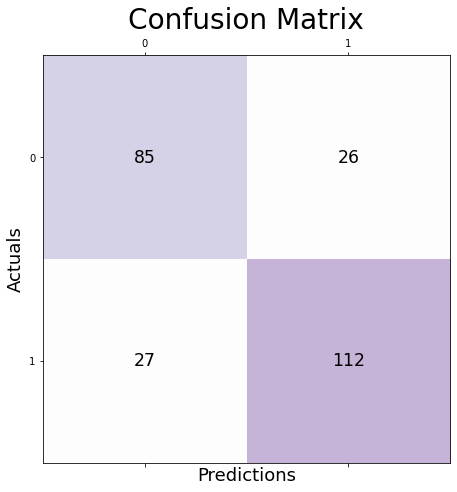

True Negative: 85
False Positive: 26
False Negative: 27
True Positive: 112


In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Purples, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=28)
plt.show()

true_negative = conf_matrix[0, 0]
print("True Negative:",true_negative)

false_positive = conf_matrix[0, 1]
print("False Positive:",false_positive)

false_negative = conf_matrix[1, 0]
print("False Negative:",false_negative)

true_positive = conf_matrix[1, 1]
print("True Positive:",true_positive)


Using the quantities mentioned above, we can find out the different performance measures for this diagnostic test, such as *Accuracy, Error Rate, Sensitivity/True Positive Rate* and *Specificity/True Negative Rate*.

In [14]:
dataset_sample_size = 250

accuracy = (true_positive+true_negative)/dataset_sample_size
error_rate = (false_positive+false_negative)/dataset_sample_size
sensitivity = true_positive/(true_positive+false_negative) # also known as true positive rate
specificity = true_negative/(true_negative+false_positive) # also known as true negative

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Sensitivity/True Positive Rate:", sensitivity)
print("Specificity/True Negative Rate:", specificity)


Accuracy: 0.788
Error Rate: 0.212
Sensitivity/True Positive Rate: 0.8057553956834532
Specificity/True Negative Rate: 0.7657657657657657


Now, using the sensitivity of this diagnostic test and the function we defined for Bayesian Theorem, we can calculate the `P(A|B)`. We will also need `P(A)` which is the probability of a person having cancer in the population. This is a quatity that cannot be calculated from the dataset as this is a Prior Probabilty and is inherent to a population and not just the sample of that population which constitutes our dataset. The hospital informed us that prevelence of cancer in the people of their region is roughly 1 in every 5000 individuals, meaning the `P(A) = 1/5000 = 0.0002`.

In [15]:
p_a=0.0002

p_b_given_a = sensitivity

p_b_given_not_a = 1 - specificity

result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))


P(A|B) = 0.069%


There are several things to note here:

* Even if the **accuracy for this diagnostic test is considerably high (78.8%)**, if 100 tests were to be conducted on 100 patients, we can say with any certainty only 0.069 times that a person actually has cancer if the test detected one.

* This clearly shows that accuracy of any implementation is on the appropraite metric to measure its applicability in a certain scenario as several important factors might not be taken into account when we only consider accuracy as the metric.

* In this case, the prevalence of cancer in the population had an impact on how well this diagnostic test will perform in real life situations.

* Therefore, Bayesian Theorem can be a useful to not only probabilistically classify data points but it also can be a tool investigate the applicability of a technique/test/process based on the data we get from them.